# Este notebook sirve de ejemplo para saber cómo python nos ayuda en el cálculo de órbitas.

In [8]:
# Installing packages

!pip install astroquery
!pip install poliastro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.7/162.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.6 MB/s eta 0:00:00


In [21]:
# Importing packages

import astropy
import astroquery
from astropy import units as u
from poliastro.bodies import Earth, Mars, Sun
from poliastro.twobody import Orbit
from poliastro.maneuver import Maneuver
from poliastro.plotting import OrbitPlotter2D

Esto grafica la órbita de la estación espacial internacional alrededor de la tierra.

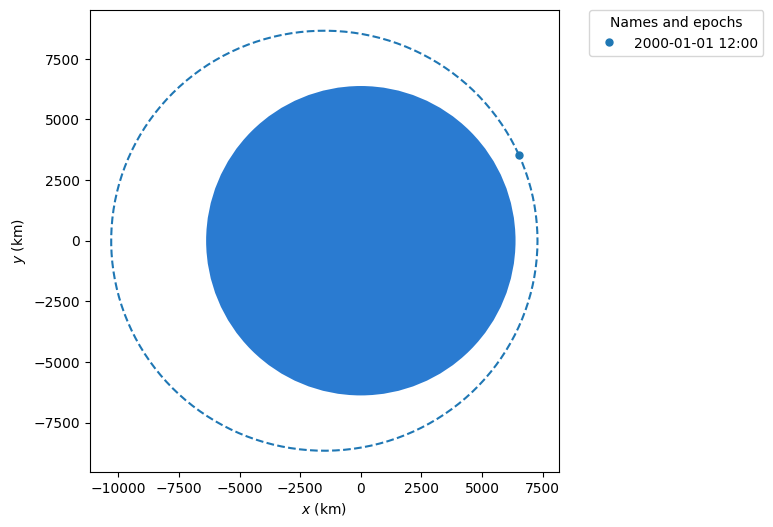

In [22]:
# Data from Curtis, example 4.3
r = [-6045, -3490, 2500] * u.km
v = [-3.457, 6.618, 2.533] * u.km / u.s

ss = Orbit.from_vectors(Earth, r, v)
ss.plot()

Gráfica la órbita de un planeta alrededor del sol, con parámetros que se pueden incluir

In [23]:
# Data for Mars at J2000 from JPL HORIZONS

a = 1.523679 * u.AU       # Longitud del semieje mayor
ecc = 0.2 * u.one         # Eccentricidad
inc = 100 * u.deg         # Inclinación
raan = 49.562 * u.deg     # Ascensión recta del nodo ascendente
argp = 286.537 * u.deg    # Argumento del pericentro
nu = 23.33 * u.deg        # Anomalía verdadera

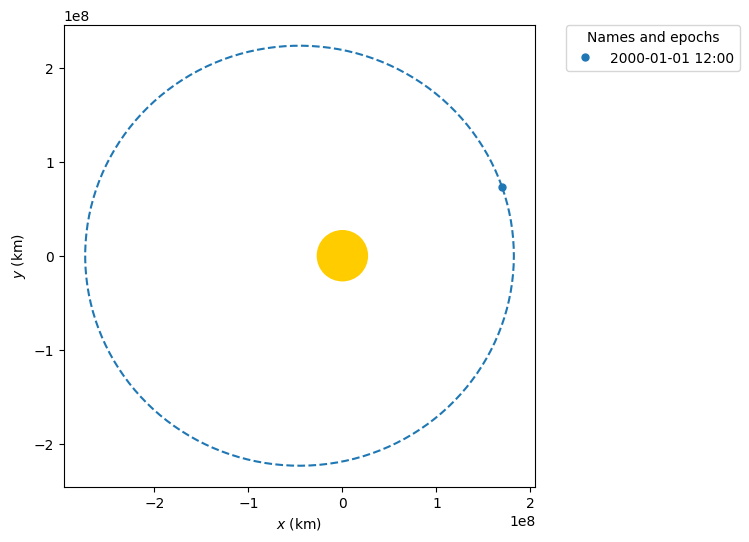

In [24]:
# Plots the orbit

ss2 = Orbit.from_classical(Sun, a, ecc, inc, raan, argp, nu)
ss2.plot()

Make transfer orbits

In [25]:
orb_i = Orbit.circular(Earth, alt=10000 << u.km)
hoh = Maneuver.hohmann(orb_i, 100000 << u.km)

/usr/local/lib/python3.10/dist-packages/poliastro/core/maneuver.py:49: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, A))
  r_i = norm(r_i)


In [26]:
op = OrbitPlotter2D()
orb_a, orb_f = orb_i.apply_maneuver(hoh, intermediate=True)
op.plot(orb_i, label="Initial orbit")
op.plot(orb_a, label="Transfer orbit")
op.plot(orb_f, label="Final orbit")